# K 평균 군집화 K-means Clustering

<p style="text-align: right;">2019.07.10 조준우 metamath@gmail.com</p>

<hr/>

머신러닝 교재에서 비지도 학습의 가장 대표적인 알고리즘으로 처음 소개되는 것이 K-means 클러스터링이다. K-means 클러스터링의 동작 방식은 비교적 간단해서 알고리즘을 이해하고 코딩하는데 큰 어려움이 없다. 많은 문헌에서 설명은 딱 여기까지다. 알고리즘의 반복이 왜 수렴하게 되는지 무엇을 목적으로 알고리즘이 반복되고 있는지 최적화 관점에서 잘 설명하지 않기 때문에 코딩까지 하고도 뭔가 석연찮은 느낌을 지울 수 가 없다. "패턴인식과 머신러닝Pattern Recognition and Machine Learning"(이하 PRML) 9장에 최적화 관점으로 K-means 클러스터링을 설명하는 내용이 있다. PRML 9장 전체 내용은 'EM 알고리즘'에 관한 것으로 K-means 클러스터링도 EM 알고리즘의 한 종류로 설명을 하고 있다. 

EM 알고리즘은 알고리즘의 원리를 이해하기가 쉽지 않아 따로 글을 마련하여 알아 볼 계획이다. 이 글은 그전에 오픈게임 같이 가벼운 마음으로 K-means 클러스터링에 대해 알아볼 수 있도록 PRML 내용을 코드와 함께 상세하게 풀어적었다. 그리고 글 마지막에는 PRML에서와 마찬가지로 이미지 클러스터링에 대한 재미있는 실습을 해보고자 한다.

글에 등장하는 수식은 모두 PRML에 나온 식들이며 이해를 돕기위해 식번호를 동일하게 매겼다.

## 목적함수

$N$개의 $D$차원 데이터 $\left\{\mathbf{x}_{1}, ... , \mathbf{x}_{N}\right\}$가 있을 때 그것을 임의의 군Cluster(이하 클러스터) $K$개로 군집시키는 문제를 생각해보자.  각 데이터 $\mathbf{x}_{n}$이 어떤 클러스터에 속하는지 나타내는 변수 $r_{nk}$를 도입한다. $r_{nk}$은 $n$번째 데이터가 $k$번째 클러스터에 속하면 1, 그렇지 않으면 0인 변수이다. 
우리가 관찰 할 수 있는 정보는 각 데이터의 위치 정보이다. 여기서 정의한 $r_{nk}$는 관찰 되지 않은 모르는 정보이다. 결국 이 정보를 알면 어느 점이 어느 클러스터에 속하는지 모두 알게되므로 문제가 풀리는 것이다. 

데이터가 생성될 때 부터 우리가 과정을 모두 관찰했다면 $r_{nk}$도 모두 알 수 있을 것이다. 클러스터를 데이터 생성 상자로 생각해보자. 어느 상자에서 데이터가 튀어 나오는지 다 관찰했다는것은 $r_{nk}$도 알고 있다는 말이 된다. 하지만 대부분 현실 문제에서는 데이터의 위치 정보만이 주어지고 클러스터에 대한 정보는 주어지지 않는다. 사실 몇개의 클러스터로부터 생성된 정보인지도 모른다. 일단 클러스터의 개수 $K$는 임의로 정한다. $K$를 정하는 방법도 있지만 알고리즘에서 그리 중요한 부분을 차지하지 않으므로 여기서는 생략한다. 그리고 아직 결정되지 않은 각 클러스터의 중심을 $\boldsymbol{\mu}_{k}$라 하자.

이제 목적함수를 다음과 같이 정의한다.

$$
J = \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk} \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2}\tag{9.1}
$$

식(9.1)의 의미는 각 데이터가 자신이 속한 클러스터의 중심과의 거리를 제곱해서 모두 더한 값이다. 클러스터의 중심으로 부터 점들이 잘 모여 있다면 이 값은 작아지게 될 것이다. 이제 식(9.1)을 최소화 시키는 $\boldsymbol{\mu}_{k}$를 알면 그것으로 부터 다음과 같이 $r_{nk}$를 알아 낼 수 있을 것 같다. 


$$
r_{nk}=
\begin{cases}
1, & \mbox{if}\quad k = \text{argmin}_{j}  \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{j} \rVert^{2} \\
0, & \mbox{otherwise}
\end{cases}
\tag{9.2}
$$


즉 $\mathbf{x}_n$과 모든 $\boldsymbol{\mu}_{j}$와 거리차를 구한 다음 가장 거리차가 작게 나오는 인덱스 $k$에 해당하는 $r_{nk}$만 1이 되고 나머지는 다 0을 할당하는 방식이다.  

이렇게 $r_{nk}$를 설정하는 방법이 현재 $\boldsymbol{\mu}_{k}$ 상태하에서 $J$를 최소화하는 것이다. 왜냐하면 $r_{nk}$는 0아니면 1인데 0이면 $J$값에 아무런 영향을 미치지 못한다. 만약 $r_{nk}$가 1이라면 그때 $r_{nk}$와 곱해지는 $ \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2}$값이 최소가 되야지만 그 합인 $J$가 최소가 된다. 그런데 식(9.2)대로 $r_{nk}$를 설정하면 $r_{nk}$의 값은 $ \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2}$가 최소가 되는 경우에만 1로 설정을 하기 때문에 결국 $J$를 최소로 만들게 된다.
그런데 대충 생각해봐도 클러스터에 어떤 점들이 포함되는지 모르는데 식(9.2)에서 그 중심인 $\boldsymbol{\mu}_{j}$를 안다는것이 조금은 이상해보인다. 그렇기 때문에 **식(9.2)는 어떤 $\boldsymbol{\mu}_{j}$들이 이미 주어졌을 때 시도할 수 있는 식이다.**

이제 식(9.1)을 $\boldsymbol{\mu}_{k}$로 미분해서 0으로 두는 최적화의 1계 필요조건을 통해 $\boldsymbol{\mu}_{k}$구하기를 시도해보기로 한다. 일단 $\boldsymbol{\mu}_{k}$로 미분을 해보자. 표기를 명확하게 하기 위해 식(9.1)의 인덱스 $k$를 $p$로 쓰고 $\boldsymbol{\mu}_{k}$로 미분할 것이다.

$$
\frac{\partial J}{\partial \boldsymbol{\mu}_{k} }\sum_{n=1}^{N} \sum_{p=1}^{K} r_{np} \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{p} \rVert^{2}
$$

위 편미분은 $\sum_{p=1}^{K}$에 해당하는 $K$개 항 중 $k=p$인 경우를 제외하면 모두 0 이므로 다음처럼 쓸 수 있다.

$$
\frac{\partial J}{\partial \boldsymbol{\mu}_{k} } \sum_{n=1}^{N} \sum_{p=1}^{K} r_{np} \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{p} \rVert^{2}
= \sum_{n=1}^{N} r_{nk}  \frac{\partial }{\partial \boldsymbol{\mu}_{k} } \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} \tag{*}
$$

이때 $\lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2}$는 다음과 같은 스칼라 값이다. 

$$
\lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} = (x_{n1} -  \mu_{k1})^2 + (x_{n2} -  \mu_{k2})^2 + \cdots + (x_{nd} -  \mu_{kd})^2 + \cdots + (x_{nD} -  \mu_{kD})^2
$$

여기서 $x_{nd}$, $\mu_{nd}$는 $\mathbf{x}_n$,  $\boldsymbol{\mu}_k$의 $d$번째 성분을 나타낸다. 이 스칼라 값을 벡터 $\boldsymbol{\mu}_{k}$로 분모 레이아웃으로 미분하면 다음과 같다. 스칼라에 대한 벡터의 미분은 스칼라를 각 벡터 성분으로 미분하는 것이므로

$$
\frac{\partial }{\partial \boldsymbol{\mu}_{k} } \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} 
= \begin{bmatrix}
\dfrac{\partial \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} }{\partial \mu_{k1}} \\ 
\dfrac{\partial \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} }{\partial \mu_{k2}} \\ 
\vdots \\ 
\dfrac{\partial \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{k} \rVert^{2} }{\partial \mu_{kD}}
\end{bmatrix}
= \begin{bmatrix}
2(x_{n1} - \mu_{k1})(-1) \\
2(x_{n2} - \mu_{k2})(-1) \\
\vdots \\
2(x_{nd} - \mu_{kD})(-1) \\
\end{bmatrix}
= -2 ( \mathbf{x}_n - \boldsymbol{\mu}_k )
$$

이 결과를 (*)에 대입하면

$$
\frac{\partial J}{\partial \boldsymbol{\mu}_{k} } \sum_{n=1}^{N} \sum_{p=1}^{K} r_{np} \lVert \mathbf{x}_{n} - \boldsymbol{\mu}_{p} \rVert^{2}
=  -2 \sum_{n=1}^{N} r_{nk}  ( \mathbf{x}_n - \boldsymbol{\mu}_k )
$$

우변의 결과를 0으로 두면 다음 식(9.3)이 유도된다.

$$
2\sum_{n=1}^{N} r_{nk}(\mathbf{x}_n -\boldsymbol{\mu}_{k}) = 0 \tag{9.3}
$$

$\boldsymbol{\mu}_{k}$에 대해서 정리하면

$$
\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{nk} \mathbf{x}_{n}}{\sum_{n}r_{nk}} \tag{9.4}
$$

위 식을 보면 결국 $\boldsymbol{\mu}_{k}$는 해당 클러스터에 포함되는 데이터의 평균이라는 것을 알 수 있다. 그리고 $\boldsymbol{\mu}_{k}$를 구하기 위해 당연하게도 $r_{nk}$가 필요함을 알 수 있다. 식(9.4)는 $J$를 $\boldsymbol{\mu}_{k}$로 미분하여 얻어낸 결과이므로 어쨌거나 식(9.4)에 의해 구해진 $\boldsymbol{\mu}_{k}$는 주어진 어떤 $r_{nk}$ 상태에서 $J$를 최소화 시키는 $\boldsymbol{\mu}_{k}$라는 것을 알 수 있다. $\boldsymbol{\mu}_{k}$를 결정하기 위해  $r_{nk}$가 필요하고  $r_{nk}$가 를 결정하기 위해 $\boldsymbol{\mu}_{k}$가 필요한 상황으로 식(9.2), (9.4)는 클러스터링을 위한 닫힌 형식의 해를 주지 못한다는 것을 알 수 있다.

이상의 결과를 정리하면 식(9.2)는 주어진 $\boldsymbol{\mu}_{k}$ 상태하에서 $J$를 최소화 시키는 $r_{nk}$를 결정하고, 식(9.4)는 주어진 $r_{nk}$ 상태하에서 $J$를 최소화 시키는 $\boldsymbol{\mu}_{k}$를 결정하게 된다. 이런 상황에서 쉽게 떠올릴 수 있는 방법은 최초 $\boldsymbol{\mu}_{k}$를 임의로 설정하고 이 둘을 반복하면서 문제를 해결하는 것이다. 최초 임의로 정한 $\boldsymbol{\mu}_{k}$를 $\boldsymbol{\mu}^{0}_{k}$라 하면 $\boldsymbol{\mu}^{0}_{k}$를 이용해서 식(9.2)로 $r_{nk}$를 결정하고, 이렇게 결정된 $r_{nk}$를 이용해서 식(9.4)에 의해 $\boldsymbol{\mu}^{0}_{k}$를 업데이트하는 것이다. 이 과정을  변화가 없어질 때까지 계속 반복한다. 이 과정은 알아봤듯이 매 반복에서 $J$의 값을 줄이게 된다. $r_{nk}$가 구성될 수 있는 경우의 수는 유한하고 유한한 각 경우에 대해서 식(9.4)에 의해 업데이트된 $\boldsymbol{\mu}_{k}$가 식(9.2)에서 더 이상 $r_{nk}$의 구성을 바꾸지 않게 된다면 더이상 업데이트는 일어나지 않고 알고리즘은 수렴하게 된다.  

## 코드 실습

정리된 결과를 가지고 실습코드를 아래와 같이 실행해보았다. 비교를 위해서 scikit-learn 라이브러리로 K-means 클러스터링을 수행하고 직접 식(9.2)와 식(9.4)를 반복하면서 얻어진 결과를 비교해보았다. 데이터로는 PRML에서 사용하는 Old Faithful Data를 사용하며 해당 csv파일의 위치는 코드에 주석으로 표시하였다. PRML의 Fig.9.1과 동일한 그림을 위해 데이터 표준화작업을 거쳤다.

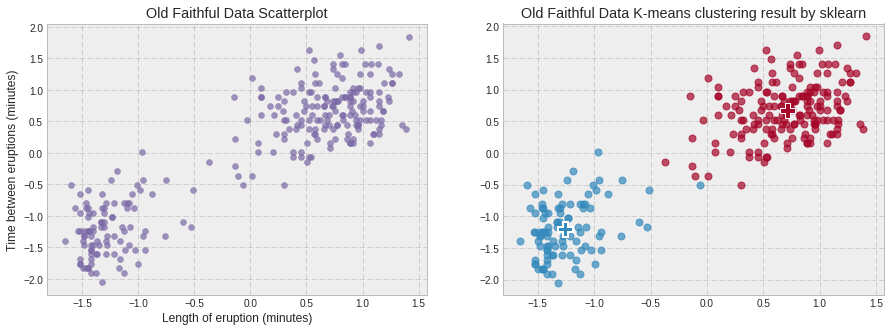

centroids (sklearn):
[[ 0.70839746  0.67549972]
 [-1.25776692 -1.19935664]]


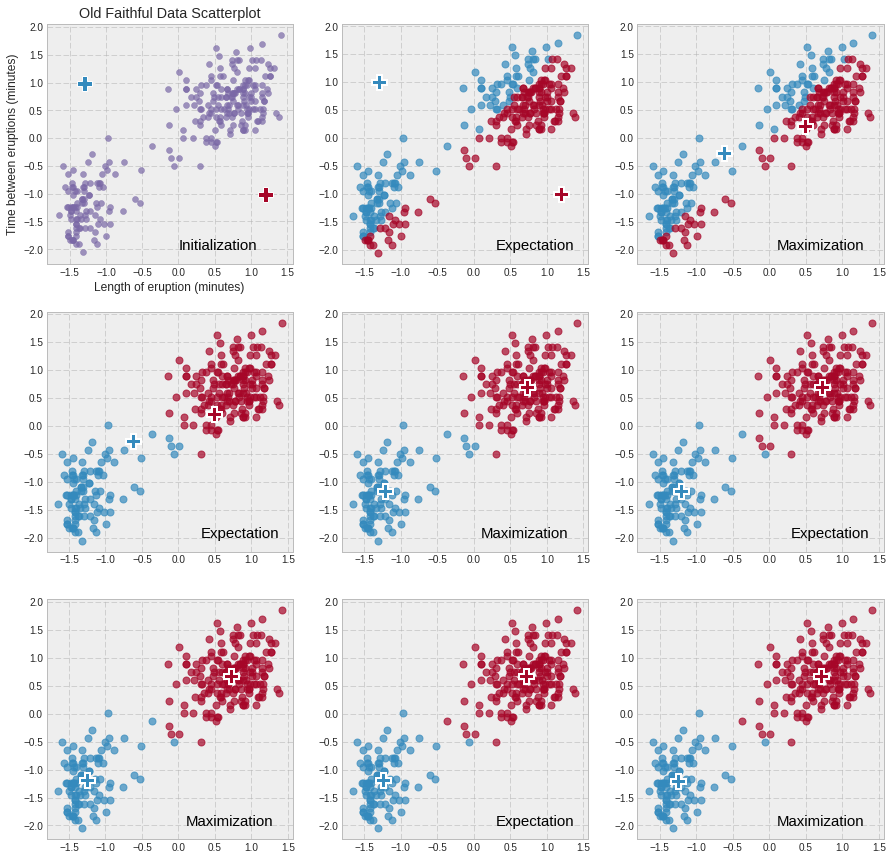

centroids (eq9.2, eq9.4):
[[-1.25776692 -1.19935664]
 [ 0.70839746  0.67549972]]


In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mpl.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,5)

# sklearn을 이용한 K-means clustering은 다음 블로그에서 발췌해옴.
# https://www.springboard.com/blog/data-mining-python-tutorial/

#faithful.cvs 위치
#http://www.biostat.jhsph.edu/~rpeng/useRbook/faithful.csv
faithful = pd.read_csv('faithful.csv')
faithful.head()

faithful = (faithful - faithful.mean()) / faithful.std()
faithful.columns = ['eruptions', 'waiting']

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(faithful.eruptions, faithful.waiting, color='#7A68A6', alpha=0.7)
ax1.set_title('Old Faithful Data Scatterplot')
ax1.set_xlabel('Length of eruption (minutes)')
ax1.set_ylabel('Time between eruptions (minutes)')

faith = np.array(faithful)
k = 2

###############################################################
# sklearn 사용하여 수행한다.
###############################################################
kmeans = KMeans(n_clusters=k)
kmeans.fit(faith)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
for i in range(k):
    # select only data observations with cluster label == i
    ds = faith[np.where(labels==i)]
    
    # plot the data observations, the centroids
    if i == 0 :
        ax2.plot(ds[:,0],ds[:,1],'o', color='#A60628', markersize=7, alpha=0.7)
        lines = ax2.plot(centroids[i,0],centroids[i,1], 
                         'P', color='#A60628', markersize=15, markeredgewidth=1, markeredgecolor='#FFFFFF')
    else :
        ax2.plot(ds[:,0],ds[:,1],'o', color="#348ABD", markersize=7, alpha=0.7)
        lines = ax2.plot(centroids[i,0],centroids[i,1], 
                         'P', color='#348ABD', markersize=15, markeredgewidth=2, markeredgecolor='#FFFFFF')

ax2.set_title('Old Faithful Data K-means clustering result by sklearn')    
plt.show()
print('centroids (sklearn):')
print(centroids)

###############################################################
# 위 수식을 이용하여 직접 구현해보기
###############################################################
plt.rcParams["figure.figsize"] = (15,15)

# 목적함수 정의 eq(1)
def J(X, MU, Rnk):
    """
      Rnk  * |   X   -   MU   |^2
    [n x k]   [n x d]  [k x d]
    X  : X.repeat(k,0).reshape(-1,k,d,).transpose(1,0,2)
    MU : MU.reshape(k, 1, d)
    Rnk*np.linalg.norm(X-MU, axis=2) 의 주대각 성분만 다 더함.
    numpy.trace(Rnk*np.linalg.norm(X-MU, axis=2))
    """
    n, d = X.shape
    k  = MU.shape[0]
    N = np.linalg.norm(X.repeat(k,0).reshape(-1,k,d,).transpose(1,0,2) - MU.reshape(k, 1, d), 
                       axis=2)
    
    return np.trace(np.dot(Rnk, N))
    
# init
centroids = np.array([[-1.3, 1.0], [1.2, -1.0]])
fig, ax = plt.subplots(3, 3)
Objective = []
ax[0,0].scatter(faithful.eruptions, faithful.waiting, color='#7A68A6', alpha=0.7)
ax[0,0].set_title('Old Faithful Data Scatterplot')
ax[0,0].set_xlabel('Length of eruption (minutes)')
ax[0,0].set_ylabel('Time between eruptions (minutes)')
ax[0,0].plot(centroids[0,0], centroids[0,1], 
             'P', color='#348ABD', markersize=15, markeredgewidth=1, markeredgecolor='#FFFFFF')
ax[0,0].plot(centroids[1,0], centroids[1,1], 
             'P', color='#A60628', markersize=15, markeredgewidth=1, markeredgecolor='#FFFFFF')
ax[0,0].text(0.0, -2.0, r'Initialization', color='k', fontdict={ 'size': 15, })

j = 0
for i in range(4): # 단계별로 그림을 그린다.
    ##########################################################################################
    # update r_nk, clustering
    rnk = np.zeros( (faith.shape[0],k) )
    for n in range(faith.shape[0]):
        x = faith[n]
        if np.linalg.norm(x-centroids[0]) < np.linalg.norm(x-centroids[1]) :
            rnk[n,0] = 1
        else :
            rnk[n,1] = 1

    # calculate J
    Objective.append(J(faith, centroids, rnk))
    
    # plot the data observations
    blue = faith[np.where(rnk[:,0]==1)]
    red = faith[np.where(rnk[:,1]==1)]
    
    j = j+1
    p, q = divmod(j, 3)
    ax[p,q].plot(blue[:,0], blue[:,1],'o', markersize=7, alpha=0.7)
    ax[p,q].plot(red[:,0],  red[:,1], 'o', markersize=7, alpha=0.7) 
    ax[p,q].plot(centroids[0,0], centroids[0,1], 
                 'P', color='#348ABD', markersize=15, markeredgewidth=2, markeredgecolor='#FFFFFF')
    ax[p,q].plot(centroids[1,0], centroids[1,1], 
                 'P', color='#A60628', markersize=15, markeredgewidth=2, markeredgecolor='#FFFFFF')
    ax[p,q].text(0.3, -2.0, r'Expectation', color='k', fontdict={ 'size': 15, })
    ##########################################################################################
    
    ##########################################################################################
    # update u_k, means
    centroids[0] = blue.mean(axis=0)
    centroids[1] = red.mean(axis=0)
    
    #calculate J
    Objective.append(J(faith, centroids, rnk))
    
    j = j +1
    p, q = divmod(j, 3)
    ax[p,q].plot(blue[:,0], blue[:,1],'o', markersize=7, alpha=0.7)
    ax[p,q].plot(red[:,0],  red[:,1], 'o', markersize=7, alpha=0.7) 
    ax[p,q].plot(centroids[0,0], centroids[0,1], 
                 'P', color='#348ABD', markersize=15, markeredgewidth=2, markeredgecolor='#FFFFFF')
    ax[p,q].plot(centroids[1,0], centroids[1,1], 
                 'P', color='#A60628', markersize=15, markeredgewidth=2, markeredgecolor='#FFFFFF')
    ax[p,q].text(0.1, -2.0, r'Maximization', color='k', fontdict={ 'size': 15, })
    ##########################################################################################
    
plt.show()
print('centroids (eq9.2, eq9.4):')
print(centroids)

sklearn으로 한 것과 직접 수식을 코딩해서 한 것 모두 동일한 결과를 확인할 수 있다. 예상대로 잘 클러스터링 되었다.

K-means 클러스터링을 위해 주어진 데이터 이외에 우리가 결정해야하는 변수 $r_{nk}$를 도입하였는데 이 과정이 EM 알고리즘과 매우 밀접한 관계가 있다. 다른 많은 문서에서 $r_{nk}$를 결정하는 과정을 Expectation이라고 하는데 그 이유는 설명하지 않는다. $\boldsymbol{\mu}$를 업데이트하는 과정을 Maximization이라고 하는 이유는 그럭저럭 이해가 가지만  $r_{nk}$를 결정하는 과정을 Expectation이라고 하는것은 쉽게 납득하기 힘들다. Maximization도 여기서는 Minimization이 되어야 맞는 것이긴 하지만 $J$의 부호를 반대로 놓고 보면 Maximization이라고 하는것도 큰 무리는 없다. 하지만 Expectation은 상황이 좀 다르다. K-means 클러스터링은 하드 클러스터링이라 $r_{nk}$를 결정하는 과정을 기대값을 계산하는 과정이라 하기 어려운 점이 있다. 그런데 굳이 Expectation 단계라고 이야기하는 이유는 EM 알고리즘의 Expectation 단계와 $r_{nk}$를 결정하는 단계가 동일선상에 있기 때문이다.

그 이유를 이해하기 위해서 알아야 할 내용이 조금 많은데 본 시리즈의 후속 글들을 통해서 차차 이유를 알아보도록 하자. 여기서는 K-means 클러스터링을 EM 알고리즘과 결부시켜 이야기하지 않고 비교적 간단한 최적화 과정으로 설명했다. 이런 방식으로도 충분히 납득할 만한 설명을 제공할 수 있었다.

실제로 $r_{nk}$를 업데이트하는 과정과 $\boldsymbol{\mu}$를 업데이트 하는 과정이 목적함수 값을 지속적으로 줄이는지  코드로 확인해보자. 

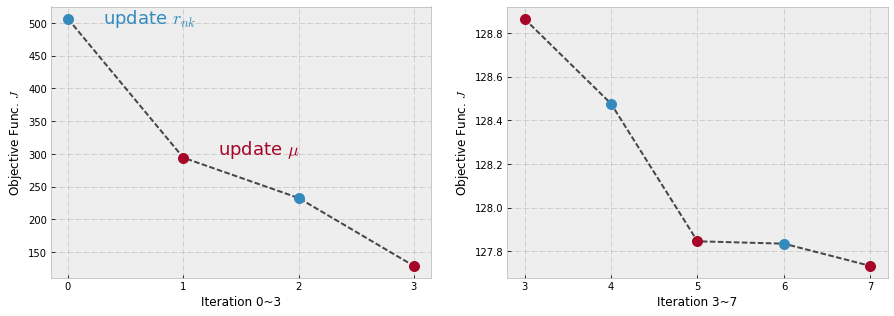

In [2]:
import matplotlib.ticker as plticker

plt.rcParams["figure.figsize"] = (15,5)
font = { 'size': 18, }

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(4), Objective[:4], '--', color='k', alpha=0.7)
ax1.plot(np.arange(4)[::2], Objective[:4][::2],   'o', color="#348ABD", markersize=10)
ax1.plot(np.arange(4)[1::2], Objective[:4][1::2], 'o', color="#A60628", markersize=10)

ax1.text(0.3, 500, r'update $r_{nk}$', color="#348ABD", fontdict=font)
ax1.text(1.3, 300, r'update $\mu$', color="#A60628", fontdict=font)
ax1.set_xlabel('Iteration 0~3')
ax1.set_ylabel('Objective Func. $J$')
loc = plticker.MultipleLocator(base=1)
ax1.xaxis.set_major_locator(loc)

ax2.plot(np.arange(3,8), Objective[3:], '--', color='k', alpha=0.7)
ax2.plot(np.arange(3,8)[::2], Objective[3:][::2],   'o', color="#A60628", markersize=10)
ax2.plot(np.arange(3,8)[1::2], Objective[3:][1::2], 'o', color="#348ABD", markersize=10)
ax2.set_xlabel('Iteration 3~7')
ax2.set_ylabel('Objective Func. $J$')
loc = plticker.MultipleLocator(base=1)
ax2.xaxis.set_major_locator(loc)

plt.show()

목적함수 식(9.1)의 값이 지속적으로 줄어들고 있는 것을 확인할 수 있으며 이는 식(9.2)와 식(9.4)가 의도한 바와 일치하는 결과이다.


## 이미지 클러스터링

마지막으로 재미삼아 K-means 클러스터링의 응용으로 이미지 클러스터링 예를 들어보도록 하자. 아래 그림의 각 픽셀을 색깔 별로  군집화하는 작업을 하는 것이다.

(187727, 3)


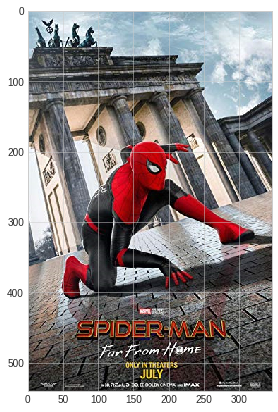

In [3]:
from mpl_toolkits import mplot3d 
mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (7,7)

img = mpl.image.imread('spiderman.jpg')
pixels = img.copy().reshape(-1,3)
print(pixels.shape)
plt.imshow(img)

위 이미지는 187727개 픽셀로 이루어져 있는데 이 중 3000개만 임의로 추출하여 RGB공간에 그려보자. 

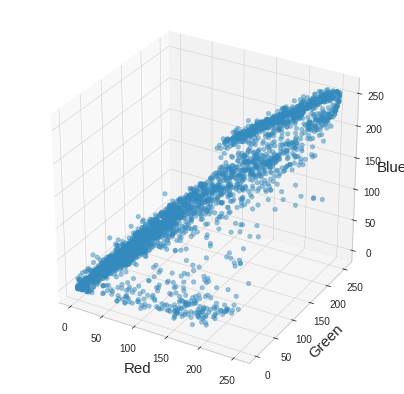

In [4]:
idx = np.random.choice(pixels.shape[0], 3000)

ax = plt.axes(projection='3d')
ax.scatter(pixels[idx,0], pixels[idx,1], pixels[idx,2], '.', alpha=0.5)
ax.set_xlabel('Red',   fontsize=15)
ax.set_ylabel('Green', fontsize=15)
ax.set_zlabel('Blue',  fontsize=15)

plt.show()

이렇게 공간에 뿌려진 점들을 적당히 가까운것들 끼리묶고 형성된 클러스터의 평균 색상을 해당 점들에 다 부여 한다.

In [5]:
images_k = []
clustering_result = []

# 클러스터 2개, 3개, 10개로 픽셀들을 나눠본다.
Ks = [2, 3, 10]

for i, k in enumerate(Ks) :
    X = img.copy().reshape(-1,3)

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # PRML p.428
    # Re-drawing the image replacing each pixel vector with the {R,G,B}
    # intensity triplet given by the centre µ_k to which that pixel has been assigned.
    for j in range(k):
        X[labels==j] = centroids[j]
    
    # 다시 그려진 이미지와 클러스터링 정보를 저장한다.
    images_k.append( X.copy().reshape(img.shape) )
    clustering_result.append( (labels.copy(), centroids.copy()) )


클러스터링 된 결과를 그림으로 그려보자. 

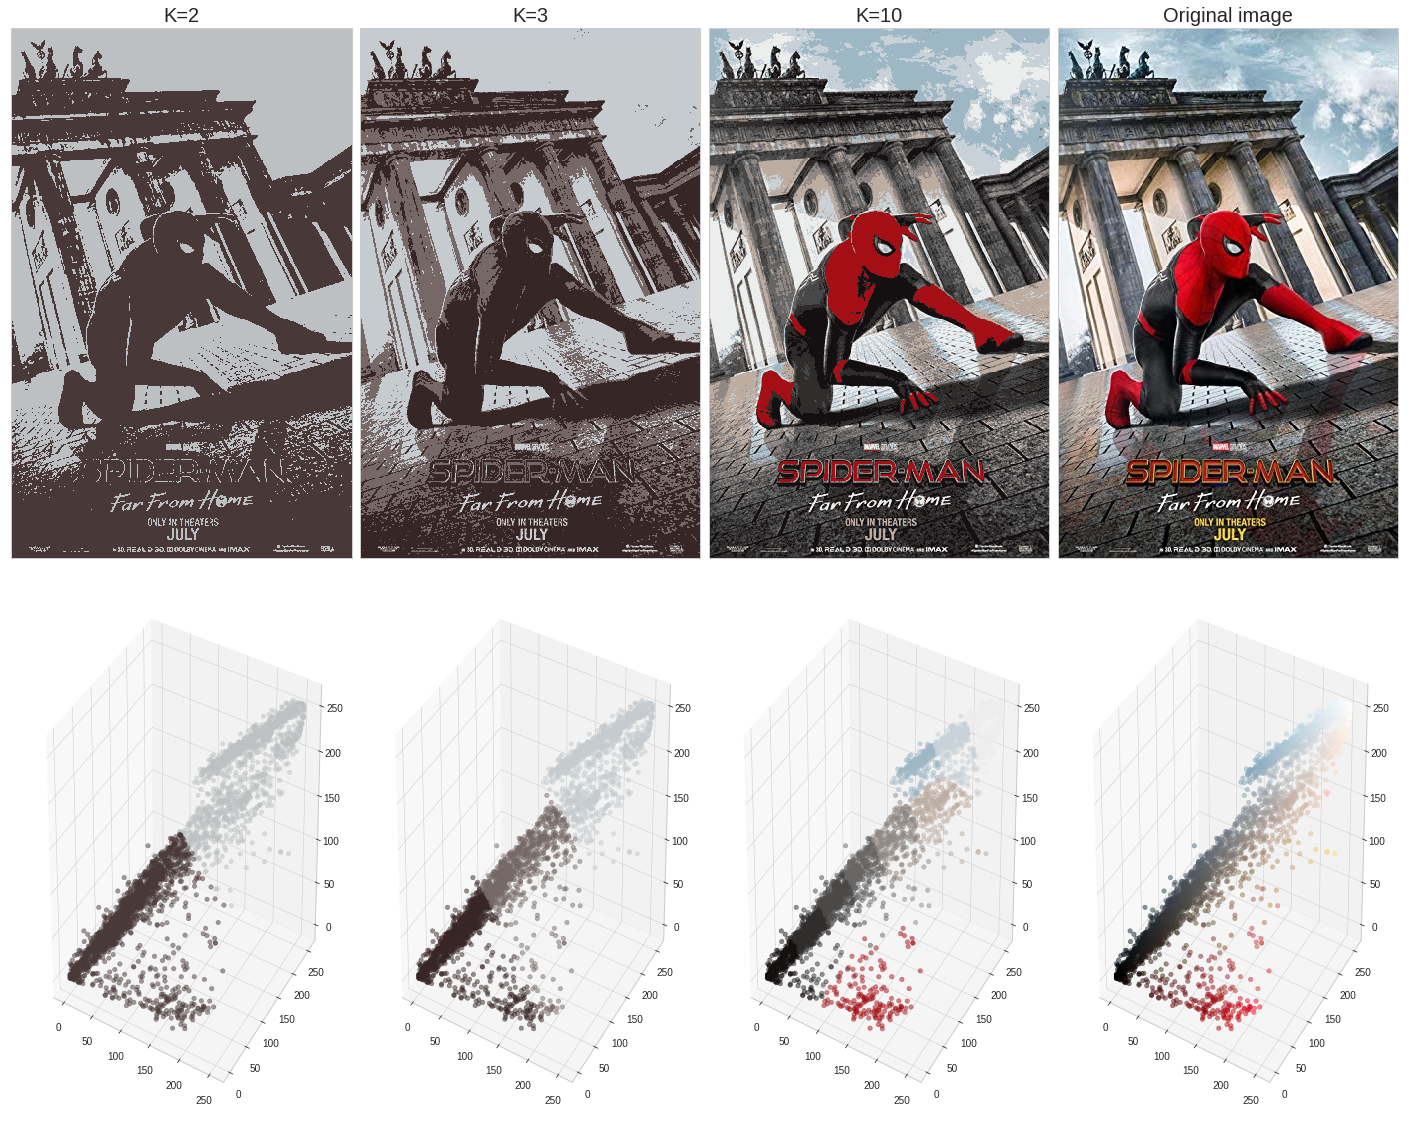

In [6]:
plt.rcParams["figure.figsize"] = (25,20)

fig = plt.figure()

row1 = [fig.add_subplot(2, 4, 1), fig.add_subplot(2, 4, 2),
        fig.add_subplot(2, 4, 3), fig.add_subplot(2, 4, 4)]

row2 = [fig.add_subplot(2, 4, 5, projection='3d'),
        fig.add_subplot(2, 4, 6, projection='3d'),
        fig.add_subplot(2, 4, 7, projection='3d'),
        fig.add_subplot(2, 4, 8, projection='3d')]

for i, k in enumerate(Ks) :
    row1[i].imshow(images_k[i])
    
    row1[i].set_title('K={}'.format(k), fontsize=20)
    row1[i].set_xticks([])
    row1[i].set_yticks([])
    
    labels, centroids = clustering_result[i]

    #  idx 에 랜덤 추출된 점 2000개 인덱스
    for j, mu_j in enumerate(centroids):
        # 추출된 점 2000개의 레이블들
        idx_labels = labels[idx]
        #                전체 픽셀 중 추출된 점들에 대해서 레이블이 j인 것들만 
        row2[i].scatter( pixels[idx][idx_labels == j][:,0], 
                         pixels[idx][idx_labels == j][:,1], 
                         pixels[idx][idx_labels == j][:,2], 'o', 
                         color=mu_j/255., alpha=0.5 )
    
row1[-1].imshow(img)
row1[-1].set_title("Original image", fontsize=20)
row1[-1].set_xticks([])
row1[-1].set_yticks([])
row2[-1].scatter( pixels[idx][:,0], pixels[idx][:,1], pixels[idx][:,2], 
                 'o', color=pixels[idx]/255., alpha=0.5 )

plt.subplots_adjust(hspace=0.05, wspace=0.0)
plt.show()

1행에는 그림을 2행에는 3000개 픽셀들이 어떻게 클러스터링 되었는지 표시하였다. 2열과 3열을 비교해보면 2열에서는 하늘에 해당하는 픽셀(2행 3차원 그림에서 위쪽부분)들이 연회색 클러스터 하나로 묶인 반면 3열은 여러가지 색으로 세분화되어 묶인것을 확인할 수 있다. 

이번 글에서는 K-means 클러스터링에 대해서 간략하게 알아보았다. 반복기법이 어떻게 유도되었는지 또 그것이 왜 수렴을 보장하는지에 대해 알아보았다. 실험코드를 통해 매 반복마다 목적함수의 값이 줄어드는 것을 확인해봤으며 색분류를 통한 이미지 클러스터링도 실험해보았다.

In [7]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1 { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2 { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    h4 { font-family: 'Noto Sans KR' !important; color:#7A68A6 !important;   }        
            
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 11pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item):not(.p-Menu-item)   
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }        
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 11pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 11pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #D55E00; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>